## Problem Set 1

MACS 30250, Dr. Evans

Ruoyun Tan

In [102]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

### 1.

In [103]:
covid_df = pd.read_csv('data/COVIDincubation.txt')
covid_df.head()

,gender,age,symp_days
0,F,52.0,5.0
1,M,42.0,6.5
2,F,32.0,3.0
3,M,22.0,4.0
4,M,41.0,8.0


#### (a)

<IPython.core.display.Javascript object>


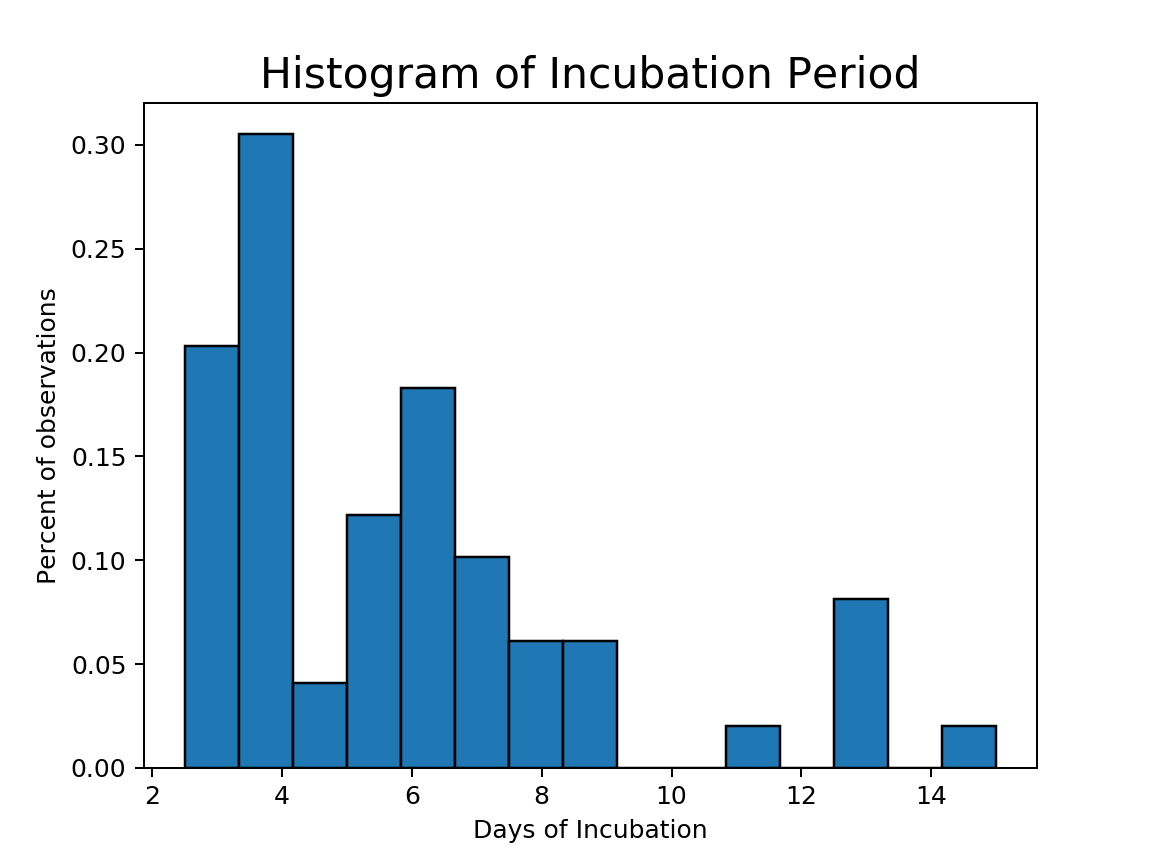

Text(0, 0.5, 'Percent of observations')

In [107]:
num_bins = 15
#Plot histogram of the complete dataset
histogram1 = plt.hist(covid_df["symp_days"], num_bins, density=True, edgecolor='k')
plt.title('Histogram of Incubation Period', fontsize=17)
plt.xlabel(r'Days of Incubation')
plt.ylabel(r'Percent of observations')

<IPython.core.display.Javascript object>


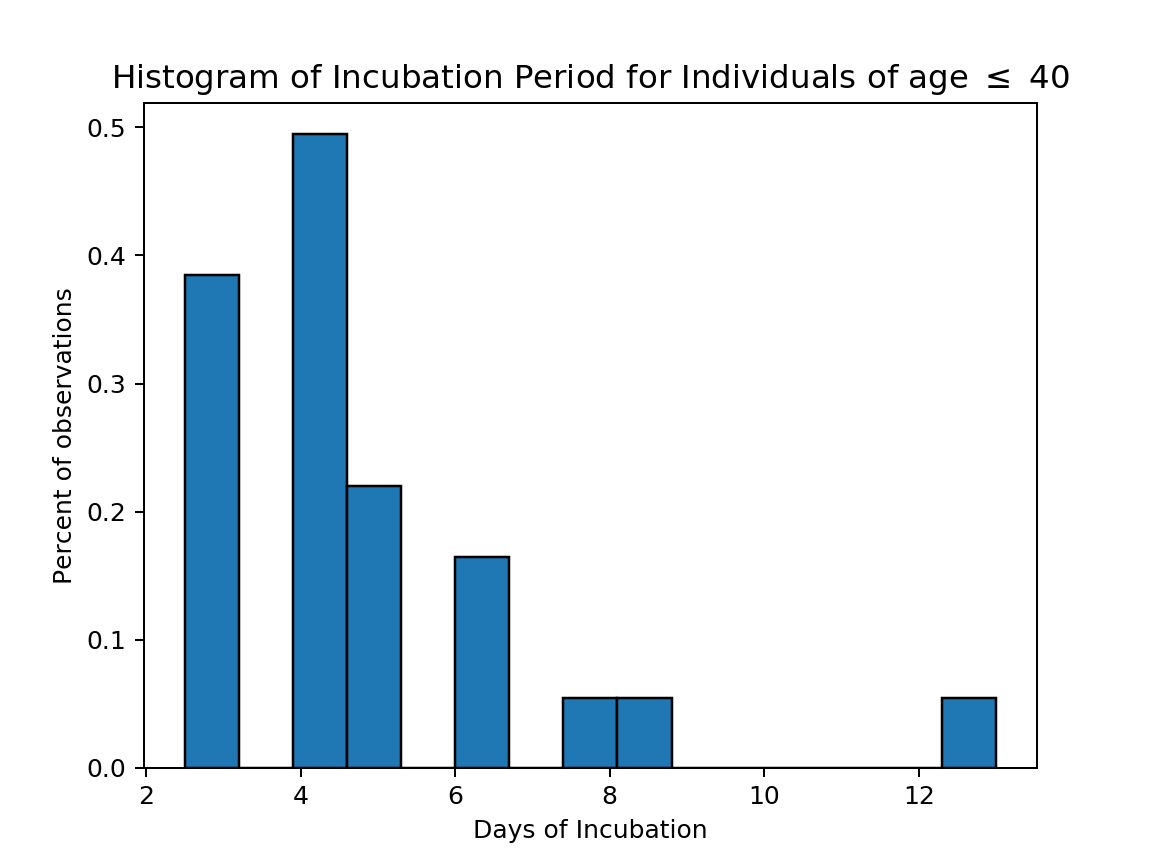

Text(0, 0.5, 'Percent of observations')

In [108]:
#Plot histogram of the individuals less than 40 years old
covid_young = covid_df[covid_df["age"] <= 40]
histogram2 = plt.hist(covid_young["symp_days"], num_bins, density=True, edgecolor='k')
plt.title('Histogram of Incubation Period for Individuals of age $\leq$ 40', fontsize=13)
plt.xlabel(r'Days of Incubation')
plt.ylabel(r'Percent of observations')

<IPython.core.display.Javascript object>


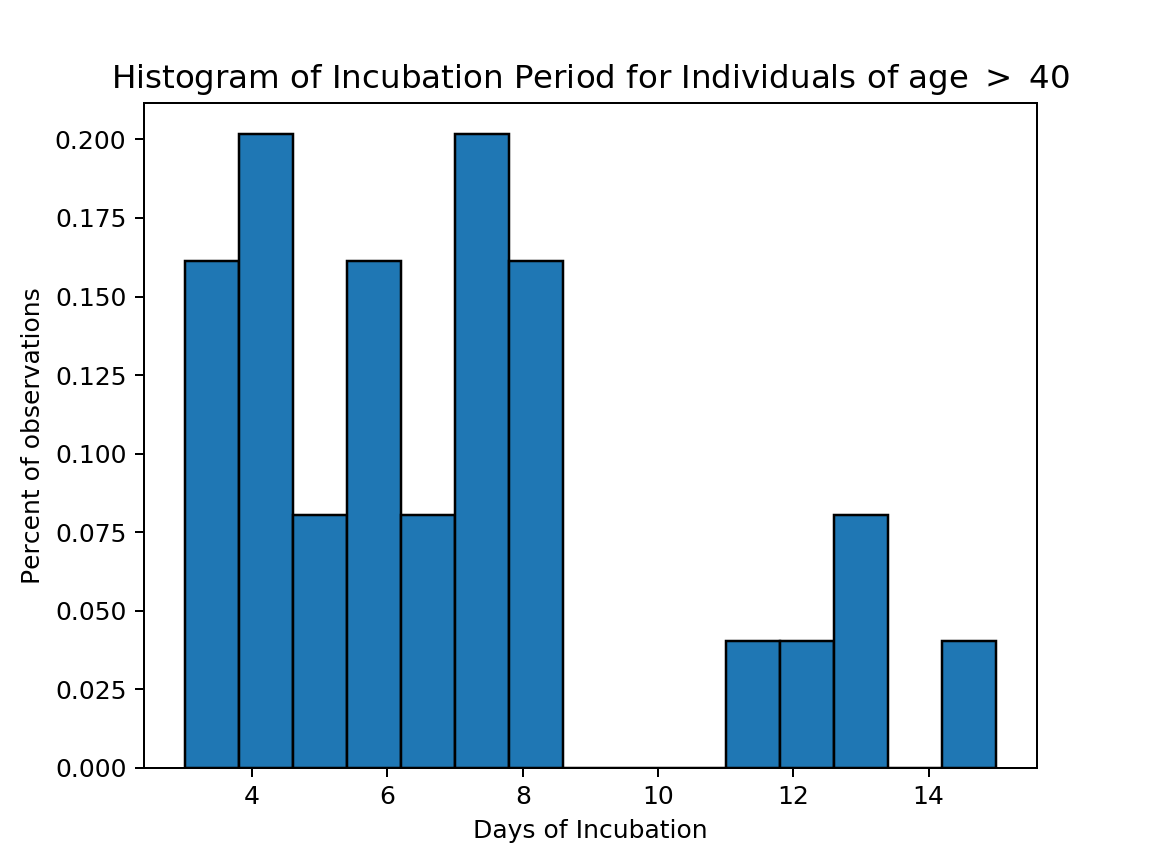

Text(0, 0.5, 'Percent of observations')

In [109]:
#Plot histogram of the individuals older than 40 years old
covid_elder = covid_df[covid_df["age"] > 40]
histogram3 = plt.hist(covid_elder["symp_days"], num_bins, density=True, edgecolor='k')
plt.title('Histogram of Incubation Period for Individuals of age $>$ 40', fontsize=13)
plt.xlabel(r'Days of Incubation')
plt.ylabel(r'Percent of observations')

#### (b)

In [110]:
bandwidths = 10 ** np.linspace(-1, 1, 500)

#Find the optimal bandwidth for the complete dataset
grid1 = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid1.fit(covid_df["symp_days"][:, None])
opt_bandwidth_complete = grid1.best_params_['bandwidth']
print("The optimal bandwidth for the complete dataset is", opt_bandwidth_complete)

The optimal bandwidth for the complete dataset is 0.8910453324821516


In [111]:
#Find the optimal bandwidth for the subset of individuals whose age is less than or equal to 40
grid2 = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid2.fit(covid_young["symp_days"][:, None])
opt_bandwidth_young = grid2.best_params_['bandwidth']
print("The optimal bandwidth for the subset of individuals whose age is less than or equal to 40 is", opt_bandwidth_young)

The optimal bandwidth for the subset of individuals whose age is less than or equal to 40 is 1.6233824316122782


In [112]:
#Find the optimal bandwidth for the subset of individuals whose age is larger than 40
grid3 = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid3.fit(covid_elder["symp_days"][:, None])
opt_bandwidth_elder = grid3.best_params_['bandwidth']
print("The optimal bandwidth for the subset of individuals whose age is larger than 40 is", opt_bandwidth_elder)

The optimal bandwidth for the subset of individuals whose age is larger than 40 is 1.1861737164524786


<IPython.core.display.Javascript object>


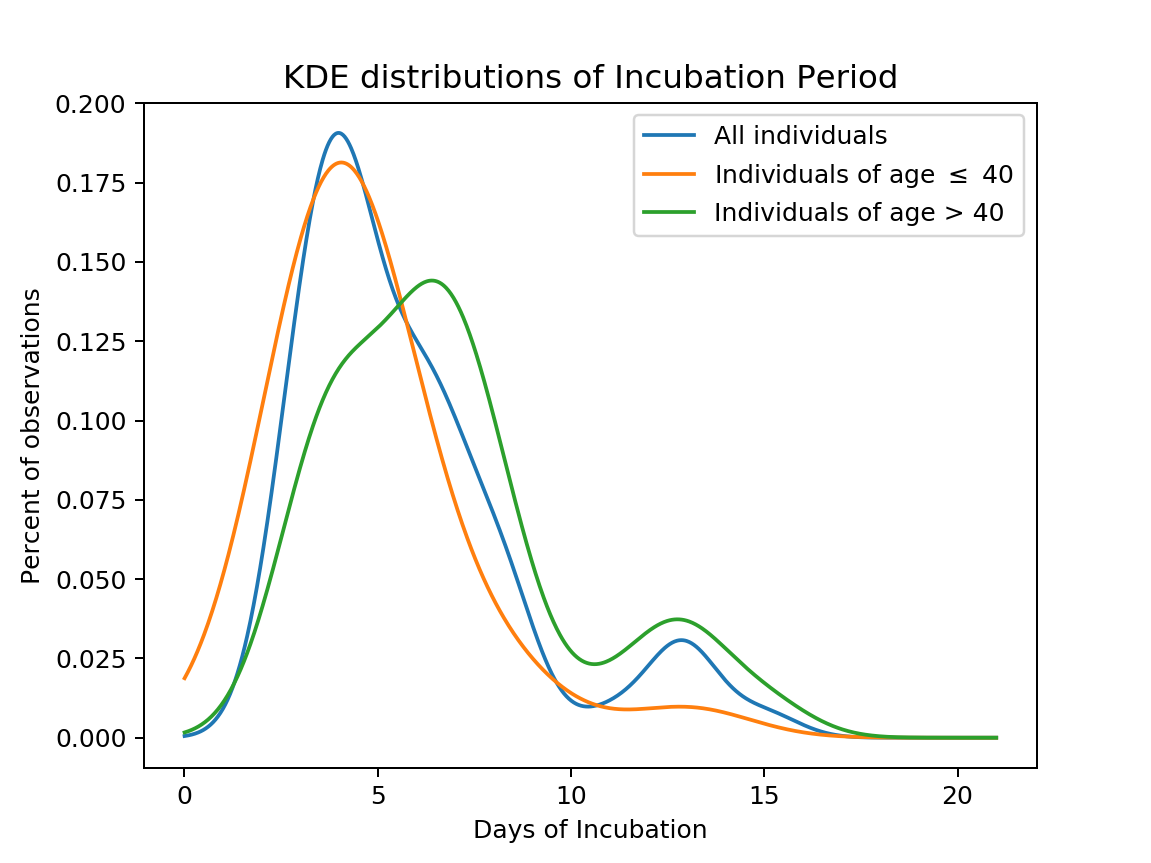

In [113]:
covid_d = np.linspace(0.01, 21, 1000)

#Fit a Gaussian KDE for the complete dataset
kde_complete = KernelDensity(bandwidth=opt_bandwidth_complete, kernel='gaussian')
kde_complete.fit(covid_df["symp_days"][:, None])
logprob1 = kde_complete.score_samples(covid_d[:, None])

#Fit a Gaussian KDE for individuals less than or equal to 40 years old
kde_young = KernelDensity(bandwidth=opt_bandwidth_young, kernel='gaussian')
kde_young.fit(covid_young["symp_days"][:, None])
logprob2 = kde_young.score_samples(covid_d[:, None])

#Fit a Gaussian KDE for individuals older than 40 years old
kde_elder = KernelDensity(bandwidth=opt_bandwidth_elder, kernel='gaussian')
kde_elder.fit(covid_elder["symp_days"][:, None])
logprob3 = kde_elder.score_samples(covid_d[:, None])

#plot the three curves
plt.plot(covid_d, np.exp(logprob1), label='All individuals')
plt.plot(covid_d, np.exp(logprob2), label='Individuals of age $\leq$ 40')
plt.plot(covid_d, np.exp(logprob3), label='Individuals of age > 40')
plt.title('KDE distributions of Incubation Period', fontsize=13)
plt.xlabel(r'Days of Incubation')
plt.ylabel(r'Percent of observations')
plt.legend()

#### (c)

The data shows that COVID-19 incubation periods of young could be shorter than those of the old individuals.

### 2.

#### (a)

<IPython.core.display.Javascript object>


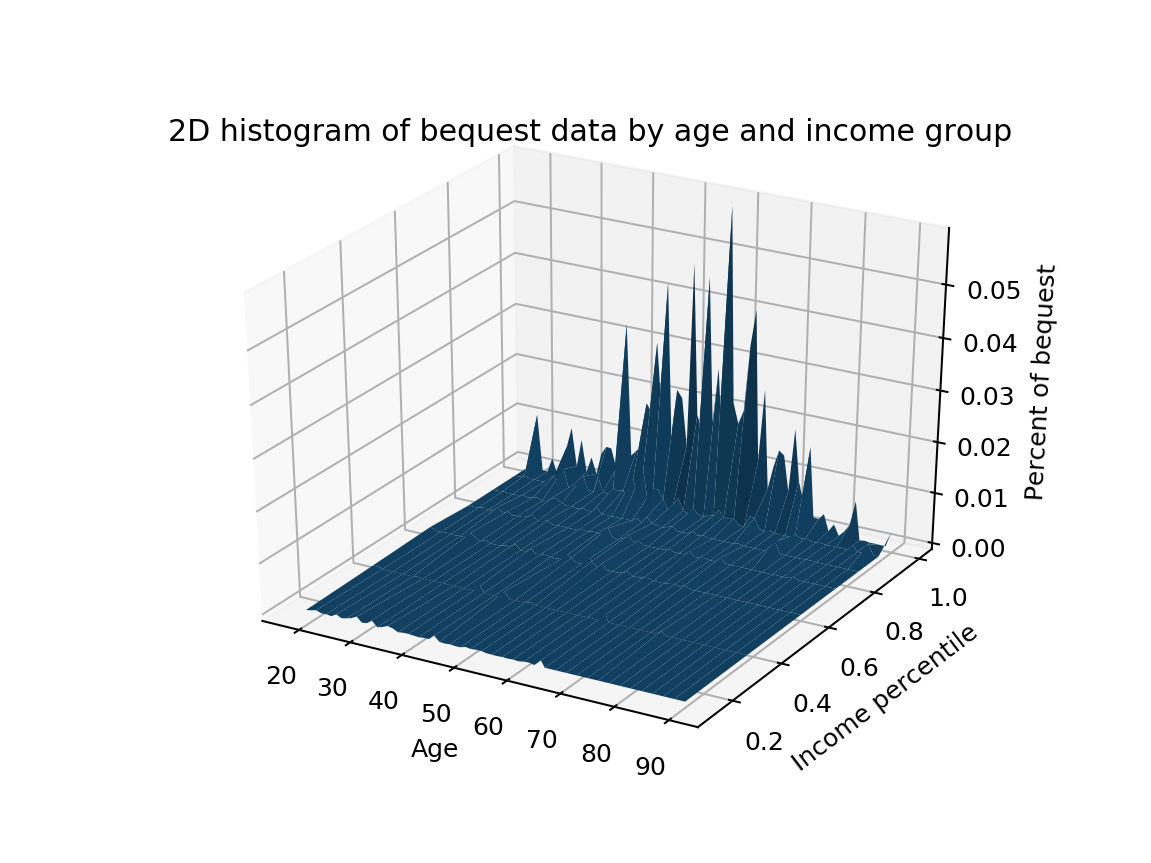

Text(0.5, 0, 'Percent of bequest')

In [114]:
bq_data = np.loadtxt('data/BQ_probmat.txt', delimiter=',')

age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])

income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, bq_data)
ax.set_title('2D histogram of bequest data by age and income group')
ax.set_xlabel('Age')
ax.set_ylabel('Income percentile')
ax.set_zlabel('Percent of bequest')

#### (b)

<IPython.core.display.Javascript object>


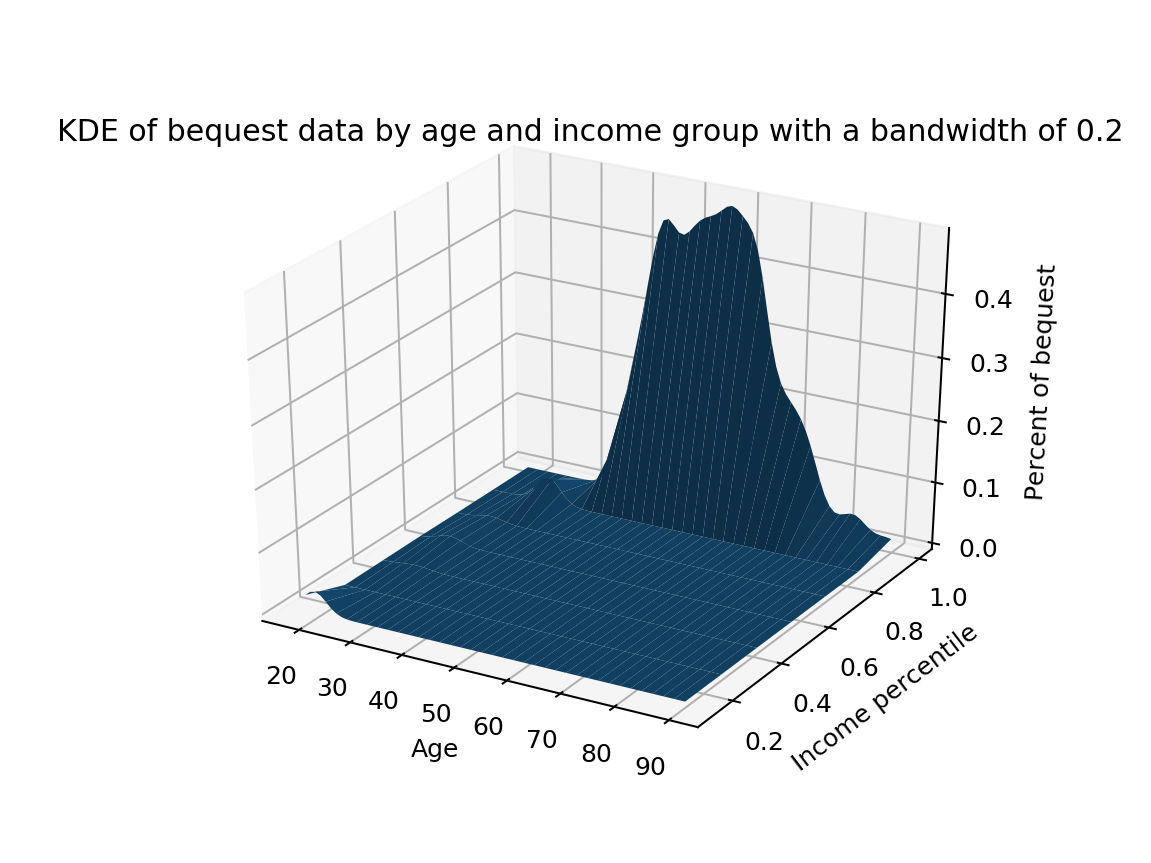

Text(0.5, 0, 'Percent of bequest')

In [115]:
bq_ind_df = pd.read_csv('data/BQ_ind_data.txt', delimiter=',')
bq_ind = bq_ind_df.values

bandwidth = 0.2
kernel = gaussian_kde(bq_ind_df.T, bw_method=bandwidth)

age_array = bq_ind_df['age']
income_array = bq_ind_df['income_pctl']
age_min = age_array.min()
age_max = age_array.max()
income_min = income_array.min()
income_max = income_array.max()
age_i, income_i = np.mgrid[age_min:age_max:73j, income_min:income_max:7j]
coords = np.vstack([item.ravel() for item in [age_i, income_i]])
Z = np.reshape(kernel(coords), age_i.shape)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_i, income_i, Z)
ax.set_title('KDE of bequest data by age and income group with a bandwidth of 0.2')
ax.set_xlabel('Age')
ax.set_ylabel('Income percentile')
ax.set_zlabel('Percent of bequest')

I tried multiple values of bandwidth to find a value that generates a smooth (but not too smooth) surface. I found that with a bandwidth of 0.2, there seems to be a balance between overﬁtting and underﬁtting. The surface plotted with this value is smooth, but not too smooth.

Using the Scott's Rule and Silverman's rule for bandwidth selection in scipy.stats.gaussian_kde, we have the following plots:

The bandwidth calculated by Scott's rule is 0.15576994264628163


<IPython.core.display.Javascript object>


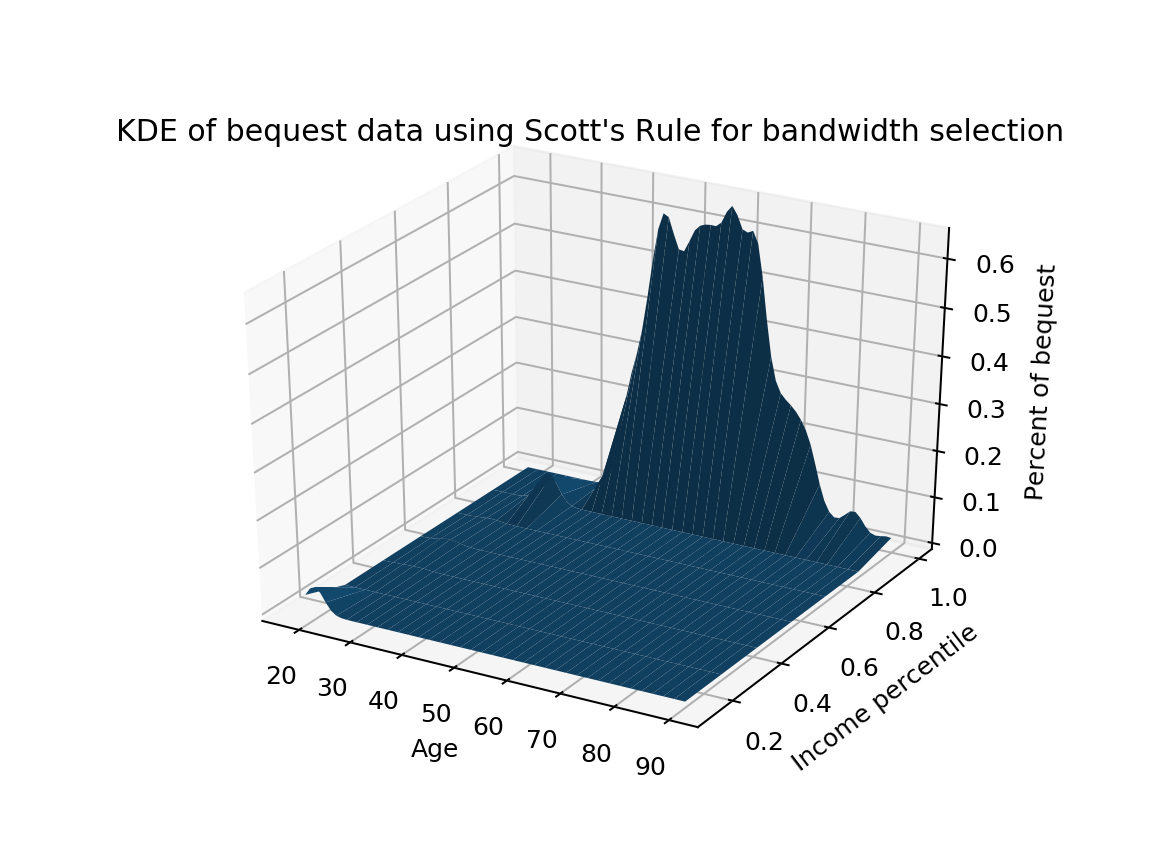

Text(0.5, 0, 'Percent of bequest')

In [116]:
kernel_scott = gaussian_kde(bq_ind_df.T, bw_method='scott')
Z_scott = np.reshape(kernel_scott(coords), age_i.shape)
print("The bandwidth calculated by Scott's rule is", kernel_scott.scotts_factor())

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_i, income_i, Z_scott)
ax.set_title("KDE of bequest data using Scott's Rule for bandwidth selection")
ax.set_xlabel('Age')
ax.set_ylabel('Income percentile')
ax.set_zlabel('Percent of bequest')

The bandwidth calculated by Silverman's rule is 0.15576994264628163


<IPython.core.display.Javascript object>


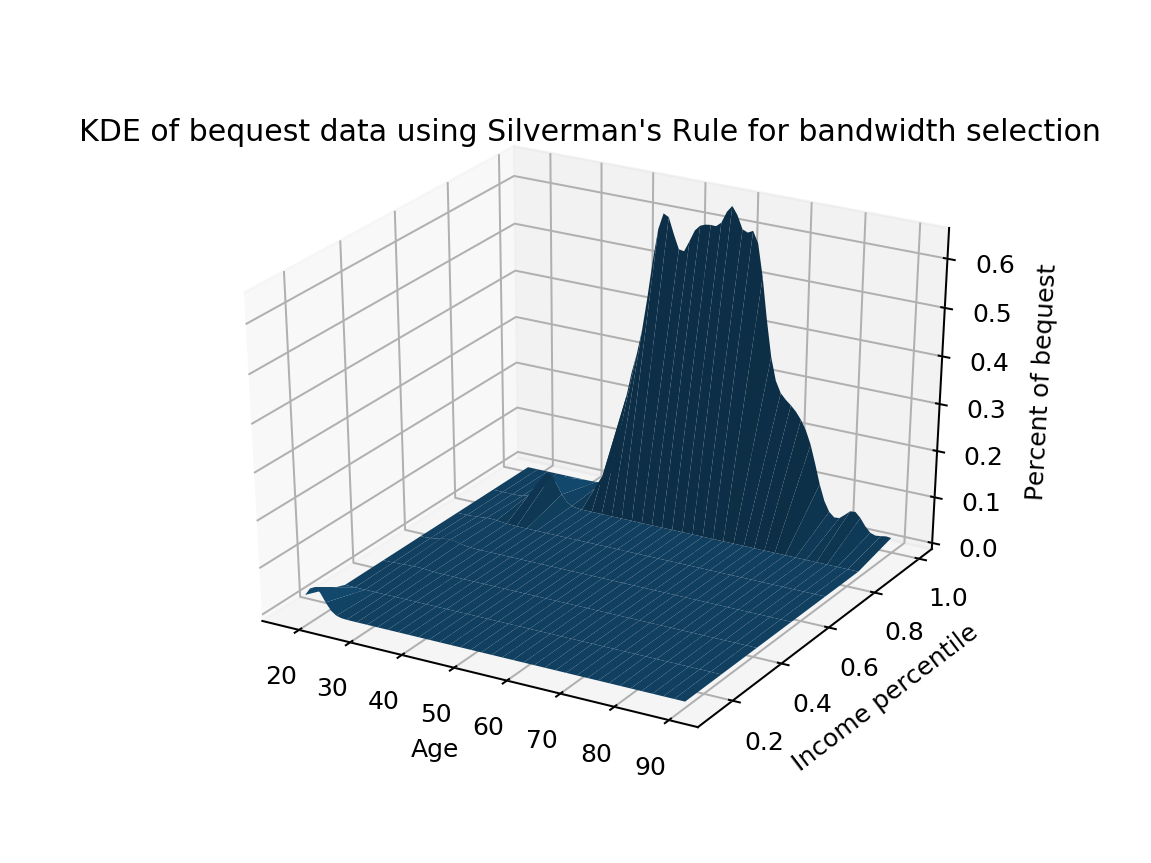

Text(0.5, 0, 'Percent of bequest')

In [117]:
kernel_silverman = gaussian_kde(bq_ind_df.T, bw_method='silverman')
Z_silverman = np.reshape(kernel_silverman(coords), age_i.shape)
print("The bandwidth calculated by Silverman's rule is", kernel_silverman.silverman_factor())

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_i, income_i, Z_silverman)
ax.set_title("KDE of bequest data using Silverman's Rule for bandwidth selection")
ax.set_xlabel('Age')
ax.set_ylabel('Income percentile')
ax.set_zlabel('Percent of bequest')

Both of the Silverman's Rule and the Scott's Rule give a bandwidth of around 0.16. So I think my original choice of $\lambda = 0.2$ is reasonable.

In [118]:
print("The estimated density for bequest recipients who are age 61 in the 6th lifetime income category is", kernel.pdf([61, lambdas_mdpts[5]])[0])

The estimated density for bequest recipients who are age 61 in the 6th lifetime income category is 0.02952665967290098
